# Classfication Exersice

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  

#### 1. Import library of pandas and numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#### 2. Load Data using Pandas

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#test_data.columns

In [6]:
train_data.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId'], axis=1, inplace=True)

In [7]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [8]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
train_data['Age'].fillna(train_data['Age'].mode()[0], inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [10]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  


In [11]:
train_data = pd.get_dummies(train_data)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


#### 7.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [13]:
y_data= train_data[['Survived']]
X_data= train_data.drop(['Survived'],axis=1)

In [14]:
y_data

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [15]:
X_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [16]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


#### 10. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,random_state=5, test_size=0.25)

#### 8. Scale all Data using `StandardScaler`

In [18]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [19]:
X_train

array([[-1.52822963, -0.43075031, -0.48457589, ...,  2.00563117,
        -0.30543361, -1.58612404],
       [-1.52822963, -0.57892082,  1.3919267 , ...,  2.00563117,
        -0.30543361, -1.58612404],
       [-0.34668172,  1.42138108,  0.4536754 , ..., -0.49859616,
        -0.30543361,  0.63046772],
       ...,
       [-1.52822963,  0.45827276, -0.48457589, ..., -0.49859616,
        -0.30543361,  0.63046772],
       [ 0.83486619,  0.23601699,  0.4536754 , ..., -0.49859616,
        -0.30543361,  0.63046772],
       [-1.52822963,  0.16193174, -0.48457589, ..., -0.49859616,
        -0.30543361,  0.63046772]])

#### 11.Building your model ( LogisticRegression Model )
 Use the default sklearn parameters and `random_state=33`

In [20]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=33, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 13. Calculate Accuracy of the model
Hint: use `LogisticRegressionModel.score(X_test, y_test)`

In [21]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.7934131736526946
LogisticRegressionModel Test Score is :  0.820627802690583
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [13]


#### 14. Calculate Confusion Matrix ,precision,recall and f1-score for first model

In [22]:
y_pred = LogisticRegressionModel.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[125  15]
 [ 25  58]]


In [24]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       140
           1       0.79      0.70      0.74        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



#### 15.Building your model ( K-NN Model )
 Use the default sklearn parameters with `n_neighbors= 5`

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5)

KNNClassifierModel.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 16. Calculate Accuracy of the K-NN model
Hint: use `KNNClassifierModel.score(X_test, y_test))`

In [27]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8488023952095808
KNNClassifierModel Test Score is :  0.8430493273542601


#### 17. Calculate Confusion Matrix ,precision,recall and F1-score for the K-NN model

In [28]:
y_pred_mod_2 = KNNClassifierModel.predict(X_test)

In [29]:
CM_2 = confusion_matrix(y_test, y_pred_mod_2)
print('Confusion Matrix for model 2 is : \n', CM_2)

Confusion Matrix for model 2 is : 
 [[127  13]
 [ 22  61]]


In [30]:
ClassificationReport = classification_report(y_test,y_pred_mod_2)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       140
           1       0.82      0.73      0.78        83

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



#### Increase K or Decrease K

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel_2 = KNeighborsClassifier(n_neighbors= 1)

KNNClassifierModel_2.fit(X_train, y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel_2.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel_2.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.9820359281437125
KNNClassifierModel Test Score is :  0.8116591928251121


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel_3 = KNeighborsClassifier(n_neighbors= 3)

KNNClassifierModel_3.fit(X_train, y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel_3.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel_3.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8652694610778443
KNNClassifierModel Test Score is :  0.8295964125560538


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [33]:
for i in range(1,12):
    KNNClassifierModel_3 = KNeighborsClassifier(n_neighbors= i)

    KNNClassifierModel_3.fit(X_train, y_train)
    print(f'KNNClassifierModel {i} Train Score is : ' , KNNClassifierModel_3.score(X_train, y_train))
    print(f'KNNClassifierModel {i} Test Score is : ' , KNNClassifierModel_3.score(X_test, y_test))

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 1 Train Score is :  0.9820359281437125
KNNClassifierModel 1 Test Score is :  0.8116591928251121
KNNClassifierModel 2 Train Score is :  0.8817365269461078


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 2 Test Score is :  0.8026905829596412
KNNClassifierModel 3 Train Score is :  0.8652694610778443
KNNClassifierModel 3 Test Score is : 

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


 0.8295964125560538
KNNClassifierModel 4 Train Score is :  0.842814371257485
KNNClassifierModel 4 Test Score is :  0.8161434977578476


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 5 Train Score is :  0.8488023952095808
KNNClassifierModel 5 Test Score is :  0.8430493273542601
KNNClassifierModel 6 Train Score is :  0.8398203592814372


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 6 Test Score is :  0.8340807174887892
KNNClassifierModel 7 Train Score is :  0.8308383233532934
KNNClassifierModel 7 Test Score is :  0.8385650224215246
KNNClassifierModel 8 Train Score is :  0.8278443113772455
KNNClassifierModel 8 Test Score is :  0.8385650224215246


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 9 Train Score is :  0.8233532934131736
KNNClassifierModel 9 Test Score is :  0.8385650224215246


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNNClassifierModel 10 Train Score is :  0.8188622754491018
KNNClassifierModel 10 Test Score is :  0.8385650224215246
KNNClassifierModel 11 Train Score is :  0.8143712574850299
KNNClassifierModel 11 Test Score is :  0.852017937219731


#### 15.Building your model ( Decision Tree )
 Use the default sklearn parameters with `random_state=1`

In [53]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifier
tree = DecisionTreeClassifier(random_state=1)
# Fit training data and training labels to decision tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [54]:
print(f'Decision Tree has {tree.tree_.node_count} nodes with a maximum depth of {tree.tree_.max_depth}.')

print(f'Model Accuracy for train data: {tree.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {tree.score(X_test, y_test)}')

Decision Tree has 341 nodes with a maximum depth of 19.
Model Accuracy for train data: 0.9835329341317365
Model Accuracy for test data: 0.8295964125560538


In [55]:
dt_predicted = tree.predict(X_test)
ClassificationReport = classification_report(y_test,dt_predicted)
print('Classification Report for Decision Tree model is : \n', ClassificationReport )

Classification Report for Decision Tree model is : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       140
           1       0.78      0.75      0.77        83

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



#### Use  pruning  decision Tree to determine the best maximum depth for test data

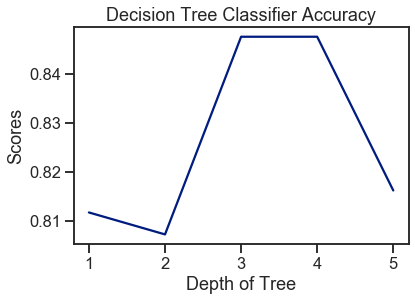

In [36]:
import seaborn as sns
# Create for loop to prune tree
scores = []

for i in range(1, 6):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))
    
# Plot graph to see how individual accuracy scores changes with tree depth
# learn more about sns and "context" https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 6), scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier Accuracy")
plt.show()

In [37]:
better_tree = DecisionTreeClassifier(random_state=1, max_depth=3)
better_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [38]:
print(f'Model Accuracy for train data: {better_tree.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {better_tree.score(X_test, y_test)}')

Model Accuracy for train data: 0.8158682634730539
Model Accuracy for test data: 0.8475336322869955


#### 15.Building your model ( Random Forest)
 - Use parameters with  `oob_score=True` , `random_state=1`, ` warm_start=True` and `n_jobs=-1` .
 - Use number of trees in range 200 : 300

In [39]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main_

[Text(0, 0.5, 'out-of-bag error'),
 Text(0.5, 1.0, 'Evaluation of Out-of-Bag Error')]

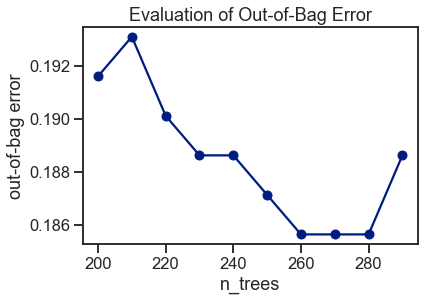

In [40]:
RF = RandomForestClassifier(oob_score=True, random_state=1, 
                            warm_start=True, n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for the number of trees
for n_trees in range(200,300,10):
    RF.set_params(n_estimators=n_trees)  # Set number of trees
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # Obtain the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error',
      title='Evaluation of Out-of-Bag Error')

In [41]:
# Create the model with 260 trees
forest = RandomForestClassifier(n_estimators=280, random_state=1, n_jobs=-1)

# Fit training data and training labels to forest
forest.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [42]:
print(f'Model Accuracy for train data: {forest.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {forest.score(X_test, y_test)}')

Model Accuracy for train data: 0.9835329341317365
Model Accuracy for test data: 0.820627802690583


#### 17. Calculate Confusion Matrix ,precision,recall and F1-score for the Decision Tree model & Random Forest

In [43]:
dt_predicted = tree.predict(X_test)
rf_predicted = forest.predict(X_test)

In [44]:
dt_CM = confusion_matrix(y_test, dt_predicted)
print('Confusion Matrix for Decision Tree model is : \n',dt_CM)

Confusion Matrix for Decision Tree model is : 
 [[133   7]
 [ 34  49]]


In [45]:
ClassificationReport = classification_report(y_test,dt_predicted)
print('Classification Report for Decision Tree model is : \n', ClassificationReport )

Classification Report for Decision Tree model is : 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       140
           1       0.88      0.59      0.71        83

    accuracy                           0.82       223
   macro avg       0.84      0.77      0.79       223
weighted avg       0.83      0.82      0.81       223



In [46]:
rf_CM = confusion_matrix(y_test,rf_predicted)
print('Confusion Matrix for Decision Tree model is : \n',rf_CM)

Confusion Matrix for Decision Tree model is : 
 [[122  18]
 [ 22  61]]


In [47]:
ClassificationReport = classification_report(y_test,rf_predicted)
print('Classification Report for  Random Forest model is : \n', ClassificationReport )

Classification Report for  Random Forest model is : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       140
           1       0.77      0.73      0.75        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [48]:
from sklearn import svm

In [49]:
clf = svm.SVC(random_state=1)
clf.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
print(f'Model Accuracy for train data: {clf.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {clf.score(X_test, y_test)}')

Model Accuracy for train data: 0.8323353293413174
Model Accuracy for test data: 0.852017937219731


In [51]:
svm_CM = confusion_matrix(y_test, dt_predicted)
print('Confusion Matrix for SVM model is : \n',svm_CM)

Confusion Matrix for SVM model is : 
 [[133   7]
 [ 34  49]]


In [52]:
svm_predicted=clf.predict(X_test)
ClassificationReport = classification_report(y_test,svm_predicted)
print('Classification Report for  Random Forest model is : \n', ClassificationReport )

Classification Report for  Random Forest model is : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       140
           1       0.90      0.67      0.77        83

    accuracy                           0.85       223
   macro avg       0.87      0.82      0.83       223
weighted avg       0.86      0.85      0.85       223

